
## How to Use the Notebooks

To run these notebooks, follow these steps:


### 1. Install **`gdal`** Package
Installing `gdal` via `pip` may fail. Therefore, we recommend using conda to install it:
```bash
conda install gdal -c conda-forge
```

### 2. Install **`polsartools`** Package

Before running the notebooks, you'll need to install the core **`polsartools`** package. 

**Option A:** Install from PyPI `pip` (stable release)

```bash
pip install polsartools
```

**Option B:** Install from conda (stable release)

```bash
conda install polsartools -c bnarayanarao
```


**Option C:**  Install the latest version from GitHub (if you need recent updates or fixes)

```bash
pip install git+https://github.com/Narayana-Rao/polsartools.git#egg=polsartools
```
> **Note:** If you encounter a `"module not found"` error or require newer features, prefer the [GitHub installation](https://github.com/Narayana-Rao/polsartools).

### 3. Verify the Installation

After successfully installing `polsartools`, you can verify it by importing the package:

```bash
import polsartools as pst
```

If this runs without errors, you're ready to explore and run the notebooks.




In [1]:
import polsartools as pst
import os
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np


In [2]:

def read_rst(file):
    ds = gdal.Open(file)
    band = ds.GetRasterBand(1)
    arr = band.ReadAsArray()
    arr[arr==0] = np.nan
    return arr


def plot_images(*filenames, lower_percentile=2, upper_percentile=98, max_cols=4):
    # Function to compute vmin and vmax based on nanpercentiles
    def compute_vmin_vmax(data):
        data_no_nan = data[np.isfinite(data)]  # Remove NaNs
        vmin = np.percentile(data_no_nan, lower_percentile)
        vmax = np.percentile(data_no_nan, upper_percentile)
        return vmin, vmax
    
    # Number of images to plot
    num_images = len(filenames)

    # Calculate the number of rows and columns
    ncols = min(max_cols, num_images)  # Use max_cols but limit it to num_images
    nrows = np.ceil(num_images / ncols).astype(int)  # Calculate number of rows

    fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 5 * nrows))
    axes = axes.flatten() 

    for i, filename in enumerate(filenames):
        data = read_rst(filename)  # Load the data from the file
        vmin, vmax = compute_vmin_vmax(data)
        ax = axes[i]
        im = ax.imshow(data, vmin=vmin, vmax=vmax)
        ax.set_title(os.path.basename(filename))
        fig.colorbar(im, ax=ax)

    # Turn off any unused axes
    for j in range(num_images, len(axes)):
        axes[j].axis('off')

    # Adjust layout
    plt.tight_layout()
    plt.show()

#### 1. Extract multilooked T3/C3 matrix elements

The sample dataset used in this tutorial can be downloaded from the following URL

https://ietr-lab.univ-rennes1.fr/polsarpro-bio/san-francisco/dataset/SAN_FRANCISCO_ALOS2.zip



In [3]:
# Provide path to the extracted folder
dataFolder = r"../data/ALOS2_QP"

#The follwoing function extracts single look S2 or mulit-looked T3/C3 matrix from ALOS-2 HBQ FP data

pst.alos2_hbq_l11(dataFolder,mat='C3',azlks=8,rglks=4)


Progress:   0%|          | 0/720 [00:00<?, ?block/s]

Progress:   0%|          | 1/720 [00:09<1:49:58,  9.18s/block]

Progress:   0%|          | 2/720 [00:09<46:06,  3.85s/block]  

Progress:   0%|          | 3/720 [00:09<27:15,  2.28s/block]

Progress:   1%|          | 4/720 [00:09<17:16,  1.45s/block]

Progress:   1%|          | 6/720 [00:10<08:44,  1.36block/s]

Progress:   1%|          | 7/720 [00:10<08:17,  1.43block/s]

Progress:   1%|▏         | 9/720 [00:10<04:59,  2.37block/s]

Progress:   1%|▏         | 10/720 [00:11<04:36,  2.57block/s]

Progress:   2%|▏         | 15/720 [00:11<01:50,  6.36block/s]

Progress:   3%|▎         | 22/720 [00:11<01:00, 11.57block/s]

Progress:   3%|▎         | 25/720 [00:12<01:18,  8.86block/s]

Progress:   4%|▍         | 27/720 [00:12<02:00,  5.75block/s]

Progress:   4%|▍         | 30/720 [00:13<01:58,  5.80block/s]

Progress:   4%|▍         | 32/720 [00:13<02:06,  5.42block/s]

Progress:   5%|▍         | 33/720 [00:14<02:32,  4.50block/s]

Progress:   5%|▌         | 37/720 [00:14<01:36,  7.11block/s]

Progress:   6%|▋         | 45/720 [00:14<00:47, 14.24block/s]

Progress:   7%|▋         | 49/720 [00:15<01:02, 10.81block/s]

Progress:   7%|▋         | 52/720 [00:15<01:21,  8.22block/s]

Progress:   8%|▊         | 54/720 [00:15<01:18,  8.48block/s]

Progress:   8%|▊         | 56/720 [00:16<01:40,  6.59block/s]

Progress:   8%|▊         | 58/720 [00:16<01:51,  5.96block/s]

Progress:   8%|▊         | 59/720 [00:17<01:44,  6.30block/s]

Progress:   8%|▊         | 60/720 [00:17<02:05,  5.28block/s]

Progress:   9%|▉         | 67/720 [00:17<00:52, 12.34block/s]

Progress:  10%|▉         | 70/720 [00:17<00:45, 14.36block/s]

Progress:  10%|█         | 73/720 [00:17<00:47, 13.66block/s]

Progress:  11%|█         | 76/720 [00:18<01:28,  7.28block/s]

Progress:  11%|█         | 78/720 [00:19<01:40,  6.39block/s]

Progress:  11%|█         | 80/720 [00:19<01:38,  6.51block/s]

Progress:  11%|█▏        | 82/720 [00:19<01:45,  6.02block/s]

Progress:  12%|█▏        | 83/720 [00:20<01:47,  5.93block/s]

Progress:  12%|█▏        | 85/720 [00:20<01:49,  5.79block/s]

Progress:  12%|█▏        | 88/720 [00:20<01:23,  7.61block/s]

Progress:  12%|█▎        | 90/720 [00:21<01:29,  7.02block/s]

Progress:  13%|█▎        | 93/720 [00:21<01:07,  9.27block/s]

Progress:  13%|█▎        | 97/720 [00:21<00:47, 13.02block/s]

Progress:  14%|█▍        | 100/720 [00:21<00:44, 13.84block/s]

Progress:  14%|█▍        | 102/720 [00:22<01:15,  8.17block/s]

Progress:  14%|█▍        | 104/720 [00:22<01:05,  9.46block/s]

Progress:  15%|█▍        | 106/720 [00:22<01:06,  9.17block/s]

Progress:  15%|█▌        | 108/720 [00:23<01:37,  6.26block/s]

Progress:  15%|█▌        | 109/720 [00:23<01:55,  5.30block/s]

Progress:  15%|█▌        | 110/720 [00:23<01:44,  5.81block/s]

Progress:  15%|█▌        | 111/720 [00:23<01:44,  5.83block/s]

Progress:  16%|█▌        | 112/720 [00:23<01:54,  5.33block/s]

Progress:  16%|█▌        | 115/720 [00:24<01:13,  8.23block/s]

Progress:  16%|█▋        | 117/720 [00:24<02:08,  4.70block/s]

Progress:  17%|█▋        | 119/720 [00:25<02:28,  4.04block/s]

Progress:  17%|█▋        | 120/720 [00:25<02:19,  4.31block/s]

Progress:  17%|█▋        | 124/720 [00:25<01:16,  7.83block/s]

Progress:  18%|█▊        | 128/720 [00:25<00:52, 11.29block/s]

Progress:  18%|█▊        | 132/720 [00:26<00:39, 15.04block/s]

Progress:  19%|█▉        | 135/720 [00:26<01:02,  9.32block/s]

Progress:  19%|█▉        | 137/720 [00:26<01:08,  8.51block/s]

Progress:  19%|█▉        | 139/720 [00:27<01:12,  8.03block/s]

Progress:  20%|█▉        | 141/720 [00:27<01:03,  9.05block/s]

Progress:  20%|█▉        | 143/720 [00:28<01:47,  5.37block/s]

Progress:  20%|██        | 145/720 [00:28<01:56,  4.94block/s]

Progress:  20%|██        | 147/720 [00:28<01:35,  6.01block/s]

Progress:  21%|██        | 151/720 [00:28<01:00,  9.39block/s]

Progress:  22%|██▏       | 158/720 [00:29<00:42, 13.16block/s]

Progress:  22%|██▏       | 160/720 [00:29<00:53, 10.40block/s]

Progress:  22%|██▎       | 162/720 [00:29<00:53, 10.37block/s]

Progress:  23%|██▎       | 164/720 [00:30<00:58,  9.58block/s]

Progress:  23%|██▎       | 166/720 [00:30<01:02,  8.88block/s]

Progress:  23%|██▎       | 168/720 [00:31<01:34,  5.86block/s]

Progress:  24%|██▎       | 170/720 [00:31<01:25,  6.41block/s]

Progress:  24%|██▍       | 173/720 [00:31<01:36,  5.64block/s]

Progress:  24%|██▍       | 175/720 [00:32<01:24,  6.47block/s]

Progress:  25%|██▍       | 179/720 [00:32<00:54,  9.95block/s]

Progress:  25%|██▌       | 183/720 [00:32<00:41, 12.87block/s]

Progress:  26%|██▌       | 185/720 [00:32<00:50, 10.51block/s]

Progress:  26%|██▌       | 188/720 [00:33<00:56,  9.34block/s]

Progress:  26%|██▋       | 190/720 [00:33<01:02,  8.50block/s]

Progress:  27%|██▋       | 192/720 [00:33<01:12,  7.31block/s]

Progress:  27%|██▋       | 193/720 [00:34<01:24,  6.24block/s]

Progress:  27%|██▋       | 194/720 [00:34<01:21,  6.45block/s]

Progress:  27%|██▋       | 195/720 [00:34<01:26,  6.07block/s]

Progress:  27%|██▋       | 196/720 [00:34<01:33,  5.61block/s]

Progress:  28%|██▊       | 198/720 [00:34<01:18,  6.67block/s]

Progress:  28%|██▊       | 200/720 [00:35<02:00,  4.31block/s]

Progress:  28%|██▊       | 203/720 [00:36<01:34,  5.44block/s]

Progress:  29%|██▉       | 208/720 [00:36<00:52,  9.84block/s]

Progress:  29%|██▉       | 210/720 [00:36<00:46, 11.00block/s]

Progress:  30%|██▉       | 215/720 [00:36<00:44, 11.47block/s]

Progress:  30%|███       | 217/720 [00:36<00:45, 10.98block/s]

Progress:  30%|███       | 219/720 [00:37<01:11,  6.97block/s]

Progress:  31%|███       | 222/720 [00:37<00:56,  8.81block/s]

Progress:  31%|███       | 224/720 [00:37<00:52,  9.43block/s]

Progress:  31%|███▏      | 226/720 [00:38<01:14,  6.63block/s]

Progress:  32%|███▏      | 228/720 [00:38<01:23,  5.87block/s]

Progress:  32%|███▏      | 230/720 [00:39<01:17,  6.35block/s]

Progress:  32%|███▏      | 233/720 [00:39<00:58,  8.31block/s]

Progress:  33%|███▎      | 235/720 [00:39<00:49,  9.73block/s]

Progress:  33%|███▎      | 241/720 [00:39<00:31, 15.10block/s]

Progress:  34%|███▍      | 243/720 [00:39<00:43, 11.08block/s]

Progress:  34%|███▍      | 245/720 [00:40<00:45, 10.39block/s]

Progress:  34%|███▍      | 247/720 [00:40<00:40, 11.62block/s]

Progress:  35%|███▍      | 249/720 [00:40<01:03,  7.39block/s]

Progress:  35%|███▍      | 251/720 [00:41<01:01,  7.67block/s]

Progress:  35%|███▌      | 253/720 [00:41<01:16,  6.14block/s]

Progress:  36%|███▌      | 256/720 [00:41<01:02,  7.43block/s]

Progress:  36%|███▌      | 257/720 [00:42<01:11,  6.44block/s]

Progress:  36%|███▌      | 258/720 [00:42<01:22,  5.58block/s]

Progress:  36%|███▋      | 261/720 [00:42<00:54,  8.39block/s]

Progress:  37%|███▋      | 267/720 [00:42<00:32, 13.89block/s]

Progress:  37%|███▋      | 269/720 [00:43<00:45,  9.82block/s]

Progress:  38%|███▊      | 273/720 [00:43<00:41, 10.88block/s]

Progress:  38%|███▊      | 275/720 [00:43<00:49,  8.97block/s]

Progress:  38%|███▊      | 277/720 [00:44<00:57,  7.67block/s]

Progress:  39%|███▊      | 278/720 [00:44<01:02,  7.09block/s]

Progress:  39%|███▉      | 279/720 [00:44<01:04,  6.83block/s]

Progress:  39%|███▉      | 280/720 [00:44<01:03,  6.88block/s]

Progress:  39%|███▉      | 282/720 [00:44<00:49,  8.92block/s]

Progress:  39%|███▉      | 284/720 [00:46<02:04,  3.51block/s]

Progress:  40%|███▉      | 285/720 [00:46<01:52,  3.86block/s]

Progress:  40%|████      | 288/720 [00:46<01:07,  6.38block/s]

Progress:  40%|████      | 290/720 [00:46<00:53,  7.97block/s]

Progress:  41%|████      | 293/720 [00:46<00:39, 10.83block/s]

Progress:  41%|████▏     | 298/720 [00:46<00:25, 16.32block/s]

Progress:  42%|████▏     | 301/720 [00:47<00:57,  7.24block/s]

Progress:  42%|████▏     | 303/720 [00:47<00:56,  7.33block/s]

Progress:  42%|████▏     | 305/720 [00:48<00:53,  7.82block/s]

Progress:  43%|████▎     | 307/720 [00:48<00:58,  7.09block/s]

Progress:  43%|████▎     | 309/720 [00:48<01:04,  6.38block/s]

Progress:  43%|████▎     | 310/720 [00:49<01:18,  5.25block/s]

Progress:  43%|████▎     | 311/720 [00:49<01:44,  3.90block/s]

Progress:  44%|████▎     | 314/720 [00:50<01:12,  5.60block/s]

Progress:  44%|████▍     | 315/720 [00:50<01:09,  5.83block/s]

Progress:  45%|████▍     | 321/720 [00:50<00:33, 12.07block/s]

Progress:  45%|████▌     | 324/720 [00:50<00:27, 14.21block/s]

Progress:  45%|████▌     | 326/720 [00:51<00:53,  7.33block/s]

Progress:  46%|████▌     | 328/720 [00:51<00:49,  7.89block/s]

Progress:  46%|████▌     | 330/720 [00:51<00:48,  7.97block/s]

Progress:  46%|████▌     | 332/720 [00:52<01:04,  6.04block/s]

Progress:  46%|████▋     | 333/720 [00:52<01:02,  6.17block/s]

Progress:  47%|████▋     | 335/720 [00:52<00:59,  6.46block/s]

Progress:  47%|████▋     | 336/720 [00:52<01:08,  5.58block/s]

Progress:  47%|████▋     | 337/720 [00:53<01:06,  5.75block/s]

Progress:  47%|████▋     | 338/720 [00:53<01:18,  4.87block/s]

Progress:  47%|████▋     | 340/720 [00:53<01:00,  6.26block/s]

Progress:  47%|████▋     | 341/720 [00:53<00:59,  6.36block/s]

Progress:  48%|████▊     | 347/720 [00:53<00:24, 15.20block/s]

Progress:  49%|████▊     | 350/720 [00:53<00:23, 16.01block/s]

Progress:  49%|████▉     | 353/720 [00:54<00:34, 10.69block/s]

Progress:  49%|████▉     | 355/720 [00:54<00:33, 10.89block/s]

Progress:  50%|████▉     | 357/720 [00:55<00:56,  6.45block/s]

Progress:  50%|████▉     | 359/720 [00:55<00:49,  7.23block/s]

Progress:  50%|█████     | 361/720 [00:55<00:47,  7.58block/s]

Progress:  50%|█████     | 363/720 [00:56<01:05,  5.45block/s]

Progress:  51%|█████     | 365/720 [00:56<01:06,  5.36block/s]

Progress:  52%|█████▏    | 371/720 [00:56<00:32, 10.67block/s]

Progress:  52%|█████▏    | 374/720 [00:56<00:27, 12.41block/s]

Progress:  52%|█████▏    | 377/720 [00:57<00:23, 14.41block/s]

Progress:  53%|█████▎    | 380/720 [00:58<00:46,  7.34block/s]

Progress:  53%|█████▎    | 382/720 [00:58<00:48,  7.02block/s]

Progress:  53%|█████▎    | 384/720 [00:58<00:41,  8.08block/s]

Progress:  54%|█████▎    | 386/720 [00:58<00:41,  8.08block/s]

Progress:  54%|█████▍    | 388/720 [00:59<01:02,  5.28block/s]

Progress:  54%|█████▍    | 389/720 [00:59<01:11,  4.61block/s]

Progress:  54%|█████▍    | 392/720 [00:59<00:47,  6.97block/s]

Progress:  55%|█████▌    | 396/720 [01:00<00:29, 10.86block/s]

Progress:  56%|█████▌    | 400/720 [01:00<00:21, 14.83block/s]

Progress:  56%|█████▌    | 403/720 [01:00<00:27, 11.32block/s]

Progress:  56%|█████▋    | 406/720 [01:01<00:44,  7.03block/s]

Progress:  57%|█████▋    | 408/720 [01:01<00:43,  7.14block/s]

Progress:  57%|█████▋    | 410/720 [01:01<00:38,  8.13block/s]

Progress:  57%|█████▋    | 412/720 [01:03<01:24,  3.63block/s]

Progress:  57%|█████▊    | 414/720 [01:03<01:07,  4.51block/s]

Progress:  58%|█████▊    | 418/720 [01:03<00:41,  7.29block/s]

Progress:  59%|█████▊    | 422/720 [01:03<00:29, 10.11block/s]

Progress:  59%|█████▉    | 427/720 [01:04<00:35,  8.28block/s]

Progress:  60%|█████▉    | 429/720 [01:05<00:50,  5.74block/s]

Progress:  60%|█████▉    | 431/720 [01:05<00:43,  6.63block/s]

Progress:  60%|██████    | 433/720 [01:05<00:49,  5.76block/s]

Progress:  60%|██████    | 435/720 [01:06<00:51,  5.50block/s]

Progress:  61%|██████    | 437/720 [01:06<00:56,  4.99block/s]

Progress:  61%|██████    | 438/720 [01:07<01:29,  3.16block/s]

Progress:  62%|██████▏   | 443/720 [01:07<00:45,  6.13block/s]

Progress:  62%|██████▏   | 447/720 [01:07<00:31,  8.79block/s]

Progress:  63%|██████▎   | 451/720 [01:08<00:23, 11.53block/s]

Progress:  63%|██████▎   | 454/720 [01:09<00:47,  5.64block/s]

Progress:  63%|██████▎   | 456/720 [01:09<00:46,  5.74block/s]

Progress:  64%|██████▎   | 458/720 [01:09<00:41,  6.27block/s]

Progress:  64%|██████▍   | 460/720 [01:10<00:50,  5.17block/s]

Progress:  64%|██████▍   | 461/720 [01:11<01:06,  3.88block/s]

Progress:  64%|██████▍   | 462/720 [01:11<01:12,  3.53block/s]

Progress:  65%|██████▌   | 468/720 [01:11<00:32,  7.87block/s]

Progress:  66%|██████▌   | 474/720 [01:11<00:18, 13.13block/s]

Progress:  66%|██████▋   | 477/720 [01:12<00:31,  7.79block/s]

Progress:  67%|██████▋   | 480/720 [01:13<00:41,  5.80block/s]

Progress:  67%|██████▋   | 482/720 [01:13<00:35,  6.75block/s]

Progress:  67%|██████▋   | 484/720 [01:14<00:37,  6.23block/s]

Progress:  68%|██████▊   | 486/720 [01:14<00:55,  4.19block/s]

Progress:  68%|██████▊   | 493/720 [01:15<00:26,  8.59block/s]

Progress:  69%|██████▉   | 496/720 [01:15<00:21, 10.39block/s]

Progress:  69%|██████▉   | 499/720 [01:15<00:21, 10.31block/s]

Progress:  70%|██████▉   | 502/720 [01:16<00:33,  6.41block/s]

Progress:  70%|███████   | 504/720 [01:16<00:36,  5.87block/s]

Progress:  70%|███████   | 506/720 [01:17<00:31,  6.81block/s]

Progress:  71%|███████   | 508/720 [01:17<00:34,  6.23block/s]

Progress:  71%|███████   | 510/720 [01:18<00:51,  4.08block/s]

Progress:  71%|███████▏  | 514/720 [01:18<00:31,  6.51block/s]

Progress:  72%|███████▏  | 519/720 [01:18<00:21,  9.56block/s]

Progress:  72%|███████▏  | 521/720 [01:18<00:19, 10.17block/s]

Progress:  73%|███████▎  | 524/720 [01:19<00:26,  7.52block/s]

Progress:  73%|███████▎  | 526/720 [01:20<00:32,  5.99block/s]

Progress:  73%|███████▎  | 529/720 [01:20<00:28,  6.64block/s]

Progress:  74%|███████▎  | 530/720 [01:20<00:32,  5.76block/s]

Progress:  74%|███████▍  | 532/720 [01:21<00:32,  5.73block/s]

Progress:  74%|███████▍  | 533/720 [01:21<00:32,  5.74block/s]

Progress:  74%|███████▍  | 534/720 [01:21<00:41,  4.45block/s]

Progress:  74%|███████▍  | 535/720 [01:21<00:39,  4.64block/s]

Progress:  75%|███████▌  | 540/720 [01:22<00:23,  7.54block/s]

Progress:  75%|███████▌  | 542/720 [01:22<00:19,  8.90block/s]

Progress:  76%|███████▌  | 544/720 [01:22<00:17, 10.18block/s]

Progress:  76%|███████▌  | 546/720 [01:22<00:19,  9.14block/s]

Progress:  76%|███████▌  | 548/720 [01:22<00:17, 10.09block/s]

Progress:  76%|███████▋  | 550/720 [01:23<00:33,  5.01block/s]

Progress:  77%|███████▋  | 551/720 [01:23<00:32,  5.17block/s]

Progress:  77%|███████▋  | 552/720 [01:24<00:31,  5.39block/s]

Progress:  77%|███████▋  | 555/720 [01:24<00:21,  7.59block/s]

Progress:  77%|███████▋  | 557/720 [01:24<00:20,  7.97block/s]

Progress:  78%|███████▊  | 560/720 [01:24<00:19,  8.21block/s]

Progress:  78%|███████▊  | 562/720 [01:25<00:16,  9.77block/s]

Progress:  78%|███████▊  | 565/720 [01:25<00:16,  9.31block/s]

Progress:  79%|███████▉  | 567/720 [01:25<00:19,  7.92block/s]

Progress:  79%|███████▉  | 568/720 [01:25<00:21,  7.06block/s]

Progress:  79%|███████▉  | 569/720 [01:26<00:21,  6.99block/s]

Progress:  79%|███████▉  | 572/720 [01:26<00:20,  7.24block/s]

Progress:  80%|███████▉  | 575/720 [01:26<00:15,  9.60block/s]

Progress:  80%|████████  | 577/720 [01:26<00:17,  8.07block/s]

Progress:  80%|████████  | 578/720 [01:27<00:18,  7.58block/s]

Progress:  81%|████████  | 581/720 [01:27<00:13, 10.60block/s]

Progress:  81%|████████  | 583/720 [01:27<00:13, 10.51block/s]

Progress:  81%|████████▏ | 585/720 [01:27<00:15,  8.46block/s]

Progress:  82%|████████▏ | 587/720 [01:28<00:18,  7.27block/s]

Progress:  82%|████████▏ | 590/720 [01:28<00:13,  9.71block/s]

Progress:  82%|████████▏ | 592/720 [01:28<00:12,  9.88block/s]

Progress:  82%|████████▎ | 594/720 [01:29<00:21,  5.87block/s]

Progress:  83%|████████▎ | 596/720 [01:29<00:18,  6.56block/s]

Progress:  83%|████████▎ | 600/720 [01:29<00:11, 10.20block/s]

Progress:  84%|████████▎ | 602/720 [01:29<00:13,  8.94block/s]

Progress:  84%|████████▍ | 604/720 [01:30<00:12,  9.19block/s]

Progress:  84%|████████▍ | 607/720 [01:30<00:09, 11.36block/s]

Progress:  85%|████████▍ | 609/720 [01:30<00:15,  7.09block/s]

Progress:  85%|████████▍ | 611/720 [01:31<00:19,  5.50block/s]

Progress:  85%|████████▌ | 613/720 [01:31<00:16,  6.55block/s]

Progress:  85%|████████▌ | 615/720 [01:31<00:17,  6.02block/s]

Progress:  86%|████████▌ | 617/720 [01:32<00:16,  6.37block/s]

Progress:  86%|████████▌ | 619/720 [01:32<00:18,  5.35block/s]

Progress:  86%|████████▌ | 620/720 [01:32<00:17,  5.59block/s]

Progress:  87%|████████▋ | 624/720 [01:33<00:09,  9.63block/s]

Progress:  87%|████████▋ | 627/720 [01:33<00:08, 10.76block/s]

Progress:  87%|████████▋ | 629/720 [01:33<00:10,  8.88block/s]

Progress:  88%|████████▊ | 631/720 [01:33<00:09,  9.88block/s]

Progress:  88%|████████▊ | 633/720 [01:33<00:07, 11.40block/s]

Progress:  88%|████████▊ | 635/720 [01:34<00:10,  7.88block/s]

Progress:  88%|████████▊ | 637/720 [01:35<00:16,  5.01block/s]

Progress:  89%|████████▉ | 639/720 [01:35<00:14,  5.70block/s]

Progress:  89%|████████▉ | 641/720 [01:35<00:12,  6.25block/s]

Progress:  89%|████████▉ | 642/720 [01:35<00:12,  6.03block/s]

Progress:  89%|████████▉ | 644/720 [01:35<00:10,  7.23block/s]

Progress:  90%|████████▉ | 645/720 [01:36<00:11,  6.25block/s]

Progress:  90%|█████████ | 651/720 [01:36<00:08,  7.96block/s]

Progress:  91%|█████████ | 653/720 [01:36<00:07,  8.70block/s]

Progress:  91%|█████████ | 656/720 [01:37<00:05, 11.15block/s]

Progress:  91%|█████████▏| 658/720 [01:37<00:07,  8.79block/s]

Progress:  92%|█████████▏| 660/720 [01:37<00:08,  6.90block/s]

Progress:  92%|█████████▏| 661/720 [01:38<00:08,  6.86block/s]

Progress:  92%|█████████▏| 662/720 [01:38<00:11,  5.10block/s]

Progress:  92%|█████████▎| 666/720 [01:38<00:06,  8.96block/s]

Progress:  93%|█████████▎| 668/720 [01:38<00:05,  8.69block/s]

Progress:  93%|█████████▎| 670/720 [01:38<00:04, 10.05block/s]

Progress:  93%|█████████▎| 673/720 [01:39<00:04, 11.61block/s]

Progress:  94%|█████████▍| 675/720 [01:39<00:04, 10.41block/s]

Progress:  94%|█████████▍| 677/720 [01:40<00:08,  5.00block/s]

Progress:  94%|█████████▍| 679/720 [01:40<00:06,  6.04block/s]

Progress:  95%|█████████▍| 681/720 [01:40<00:06,  5.62block/s]

Progress:  95%|█████████▍| 682/720 [01:41<00:06,  5.80block/s]

Progress:  95%|█████████▍| 683/720 [01:41<00:06,  6.10block/s]

Progress:  95%|█████████▌| 684/720 [01:41<00:08,  4.21block/s]

Progress:  95%|█████████▌| 685/720 [01:41<00:08,  4.13block/s]

Progress:  95%|█████████▌| 686/720 [01:42<00:07,  4.45block/s]

Progress:  95%|█████████▌| 687/720 [01:42<00:07,  4.57block/s]

Progress:  96%|█████████▌| 690/720 [01:42<00:03,  8.03block/s]

Progress:  96%|█████████▌| 692/720 [01:42<00:03,  7.79block/s]

Progress:  96%|█████████▋| 694/720 [01:42<00:02,  8.84block/s]

Progress:  97%|█████████▋| 696/720 [01:43<00:02,  9.01block/s]

Progress:  97%|█████████▋| 698/720 [01:43<00:02, 10.38block/s]

Progress:  97%|█████████▋| 700/720 [01:43<00:03,  6.17block/s]

Progress:  98%|█████████▊| 703/720 [01:44<00:02,  8.37block/s]

Progress:  98%|█████████▊| 705/720 [01:44<00:01,  8.61block/s]

Progress:  98%|█████████▊| 709/720 [01:44<00:00, 11.05block/s]

Progress:  99%|█████████▉| 714/720 [01:44<00:00, 16.48block/s]

Progress: 100%|██████████| 720/720 [01:44<00:00, 23.78block/s]

Progress: 100%|██████████| 720/720 [01:44<00:00,  6.88block/s]

Saved file ../data/ALOS2_QP\C3\C11.tif


Saved file ../data/ALOS2_QP\C3\C12_real.tif


Saved file ../data/ALOS2_QP\C3\C12_imag.tif


Saved file ../data/ALOS2_QP\C3\C13_real.tif


Saved file ../data/ALOS2_QP\C3\C13_imag.tif


Saved file ../data/ALOS2_QP\C3\C22.tif


Saved file ../data/ALOS2_QP\C3\C23_real.tif


Saved file ../data/ALOS2_QP\C3\C23_imag.tif


Saved file ../data/ALOS2_QP\C3\C33.tif


Execution time for convert_S: 02:49 (min:sec)


Execution time for alos2_hbq_l11: 03:09 (min:sec)


#### 2. Speckle filtering using polarimetric refined-Lee filter (optional)

In [4]:
"""
The following function generates speckel filtered polarimetric matrices using refined lee polarimetric speckle filter: 
        
input C3/T3/C2/T2 folder path, window_size between 3-31  

"""

C3Folder = os.path.join(dataFolder,'C3')
window_size = 3
pst.rlee(C3Folder,win=window_size)

Progress:   0%|          | 0/24 [00:00<?, ?block/s]

Progress:   4%|▍         | 1/24 [00:09<03:36,  9.42s/block]

Progress:  21%|██        | 5/24 [00:09<00:27,  1.44s/block]

Progress:  46%|████▌     | 11/24 [00:09<00:06,  1.91block/s]

Progress:  58%|█████▊    | 14/24 [00:10<00:04,  2.43block/s]

Progress:  67%|██████▋   | 16/24 [00:10<00:03,  2.60block/s]

Progress:  83%|████████▎ | 20/24 [00:11<00:01,  3.19block/s]

Progress:  92%|█████████▏| 22/24 [00:11<00:00,  3.57block/s]

Progress: 100%|██████████| 24/24 [00:12<00:00,  2.00block/s]

Saved file ../data/ALOS2_QP\rlee_3x3\C3\C11.tif


Saved file ../data/ALOS2_QP\rlee_3x3\C3\C12_real.tif


Saved file ../data/ALOS2_QP\rlee_3x3\C3\C12_imag.tif


Saved file ../data/ALOS2_QP\rlee_3x3\C3\C13_real.tif


Saved file ../data/ALOS2_QP\rlee_3x3\C3\C13_imag.tif


Saved file ../data/ALOS2_QP\rlee_3x3\C3\C22.tif


Saved file ../data/ALOS2_QP\rlee_3x3\C3\C23_real.tif


Saved file ../data/ALOS2_QP\rlee_3x3\C3\C23_imag.tif


Saved file ../data/ALOS2_QP\rlee_3x3\C3\C33.tif
Execution time for rlee: 20.00 seconds


#### 3. Generate a quick look Pauli RGB from C3/T3 matrix (optional)

Pauli RGB image saved as ../data/ALOS2_QP\rlee_3x3\C3\PauliRGB.png
Execution time for pauliRGB: 4.00 seconds


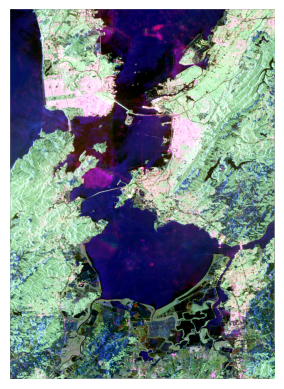

In [5]:
# update the C3 folder based on your folder
C3Folder = os.path.join(dataFolder,'rlee_3x3','C3')

pst.pauliRGB(C3Folder)

#### 4. Generating Decomposition parameters

#### 4.1. Generate H/A/α Decomposition parameters

Progress:   0%|          | 0/24 [00:00<?, ?block/s]

Progress:   4%|▍         | 1/24 [00:46<17:38, 46.02s/block]

Progress:   8%|▊         | 2/24 [00:47<07:09, 19.53s/block]

Progress:  17%|█▋        | 4/24 [00:47<02:28,  7.45s/block]

Progress:  21%|██        | 5/24 [00:47<01:39,  5.22s/block]

Progress:  25%|██▌       | 6/24 [00:48<01:06,  3.72s/block]

Progress:  29%|██▉       | 7/24 [00:48<00:45,  2.66s/block]

Progress:  38%|███▊      | 9/24 [00:48<00:22,  1.50s/block]

Progress:  54%|█████▍    | 13/24 [00:49<00:07,  1.40block/s]

Progress:  58%|█████▊    | 14/24 [00:49<00:06,  1.61block/s]

Progress:  62%|██████▎   | 15/24 [00:51<00:07,  1.16block/s]

Progress:  67%|██████▋   | 16/24 [00:54<00:11,  1.46s/block]

Progress:  71%|███████   | 17/24 [00:54<00:08,  1.15s/block]

Progress:  83%|████████▎ | 20/24 [00:57<00:03,  1.04block/s]

Progress:  88%|████████▊ | 21/24 [00:57<00:02,  1.10block/s]

Progress: 100%|██████████| 24/24 [00:58<00:00,  1.82block/s]

Progress: 100%|██████████| 24/24 [00:58<00:00,  2.43s/block]

Saved file ../data/ALOS2_QP\rlee_3x3\C3\H_fp.tif


Saved file ../data/ALOS2_QP\rlee_3x3\C3\alpha_fp.tif


Saved file ../data/ALOS2_QP\rlee_3x3\C3\anisotropy_fp.tif


Saved file ../data/ALOS2_QP\rlee_3x3\C3\e1_norm.tif


Saved file ../data/ALOS2_QP\rlee_3x3\C3\e2_norm.tif


Saved file ../data/ALOS2_QP\rlee_3x3\C3\e3_norm.tif
Execution time for halpha_fp: 01:02 (min:sec)


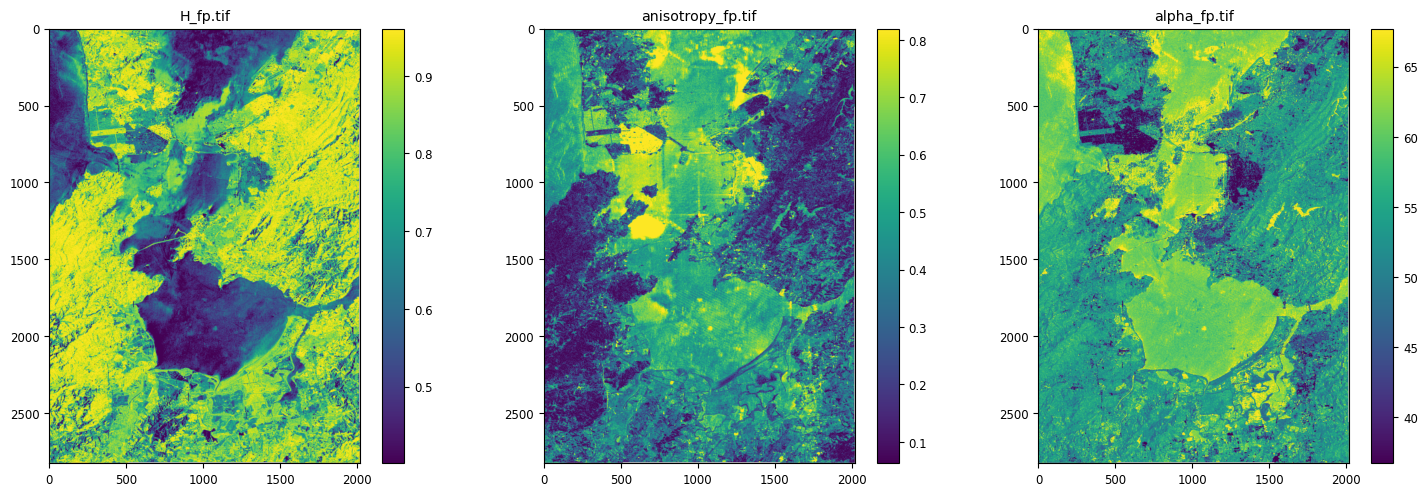

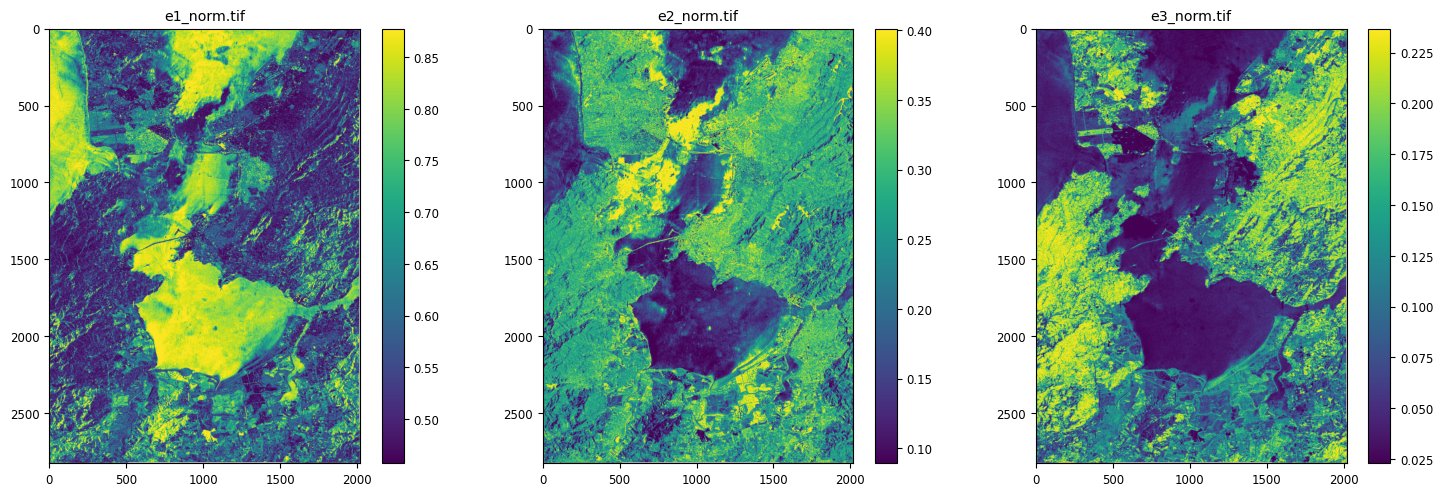

In [6]:

"""
The following function generates H/A/alpha demposition paramters: 
        Alpha, entropy, anisotropy and 
        normalized eigen values e1_norm, e2_norm, e3_norm in geotif format

input C3/T3 folder path, window_size is optional  

"""

pst.halpha_fp(C3Folder,win=3) 


### Plotting
plot_images(os.path.join(C3Folder,'H_fp.tif'),
             os.path.join(C3Folder,'anisotropy_fp.tif'),
              os.path.join(C3Folder,'alpha_fp.tif'))

plot_images(os.path.join(C3Folder,'e1_norm.tif'),
             os.path.join(C3Folder,'e2_norm.tif'),
             os.path.join(C3Folder,'e3_norm.tif'))




#### Plot Entropy-Alpha 2D plane

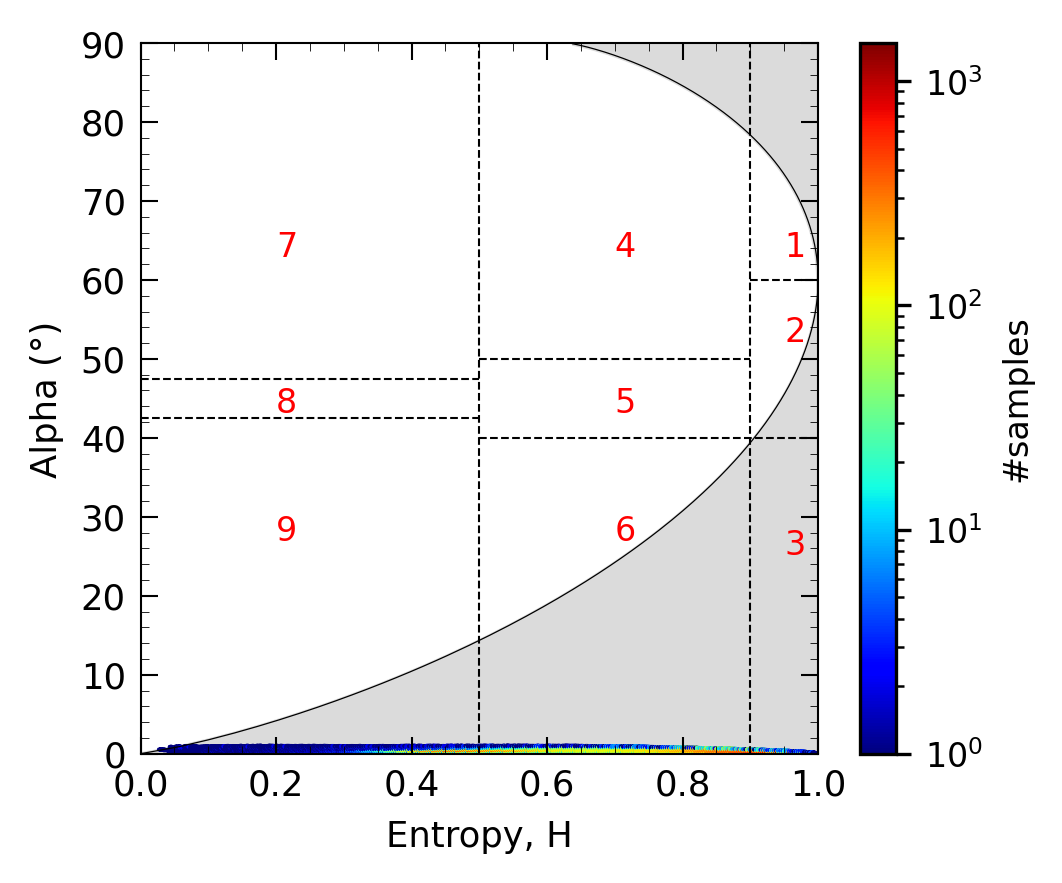

In [7]:
hFile = C3Folder + '/H_fp.tif'
aFile = C3Folder + '/anisotropy_fp.tif'

pst.halpha_plot_fp(hFile,aFile,cmap='jet',norm='log')

#### Plot a 3D Entropy-Anisotropy-Alpha plot

Execution time for haalpha_plot_fp: 5.00 seconds


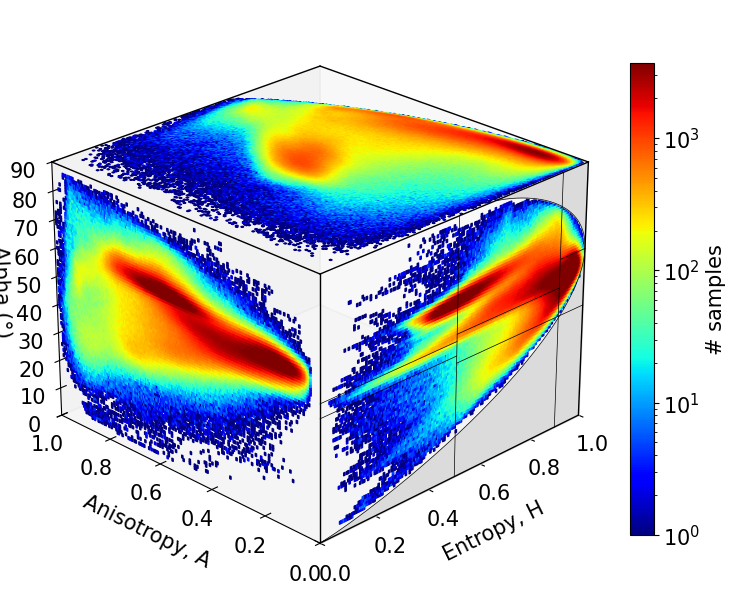

In [8]:
hFile = C3Folder + '/H_fp.tif'
aFile = C3Folder + '/anisotropy_fp.tif'
alphaFile = C3Folder + '/alpha_fp.tif'

pst.haalpha_plot_fp(hFile,aFile,alphaFile,cmap='jet',               
                   norm='log',
                   # path = '',# give a name.png to save the plot as png 
                  zone_lines=True,
                  # zone_ids=False,
                   )

#### 4.2. Generate Yamaguchi 4-Component Decomposition parameters

In [9]:
"""
The following function generates Yamaguchi 4-Component Decomposition parameters: 
        Yam4co_odd, Yam4co_dbl, Yam4co_vol and Yam4co_hlx in geotif format

input C3/T3 folder path, window_size is optional  

"""

pst.yam4c_fp(C3Folder,win=3) 

Progress:   0%|          | 0/24 [00:00<?, ?block/s]

Progress:   4%|▍         | 1/24 [01:37<37:13, 97.11s/block]

Progress:   8%|▊         | 2/24 [01:38<14:53, 40.61s/block]

Progress:  12%|█▎        | 3/24 [01:41<08:14, 23.54s/block]

Progress:  17%|█▋        | 4/24 [01:43<04:58, 14.93s/block]

Progress:  21%|██        | 5/24 [01:44<03:07,  9.89s/block]

Progress:  25%|██▌       | 6/24 [01:44<01:59,  6.64s/block]

Progress:  33%|███▎      | 8/24 [01:44<00:54,  3.41s/block]

Progress:  38%|███▊      | 9/24 [01:45<00:40,  2.67s/block]

Progress:  42%|████▏     | 10/24 [01:45<00:29,  2.08s/block]

Progress:  46%|████▌     | 11/24 [01:46<00:22,  1.70s/block]

Progress:  54%|█████▍    | 13/24 [01:46<00:11,  1.01s/block]

Progress:  62%|██████▎   | 15/24 [01:47<00:06,  1.45block/s]

Progress:  67%|██████▋   | 16/24 [02:05<00:36,  4.53s/block]

Progress:  71%|███████   | 17/24 [02:06<00:25,  3.67s/block]

Progress:  75%|███████▌  | 18/24 [02:06<00:16,  2.79s/block]

Progress:  83%|████████▎ | 20/24 [02:24<00:21,  5.35s/block]

Progress:  88%|████████▊ | 21/24 [02:26<00:13,  4.55s/block]

Progress:  92%|█████████▏| 22/24 [02:28<00:07,  3.95s/block]

Progress:  96%|█████████▌| 23/24 [02:32<00:04,  4.10s/block]

Progress: 100%|██████████| 24/24 [02:34<00:00,  3.40s/block]

Progress: 100%|██████████| 24/24 [02:34<00:00,  6.43s/block]

Saved file ../data/ALOS2_QP\rlee_3x3\C3\Yam4co_odd.tif


Saved file ../data/ALOS2_QP\rlee_3x3\C3\Yam4co_dbl.tif


Saved file ../data/ALOS2_QP\rlee_3x3\C3\Yam4co_vol.tif


Saved file ../data/ALOS2_QP\rlee_3x3\C3\Yam4co_hlx.tif
Execution time for yam4c_fp: 02:39 (min:sec)


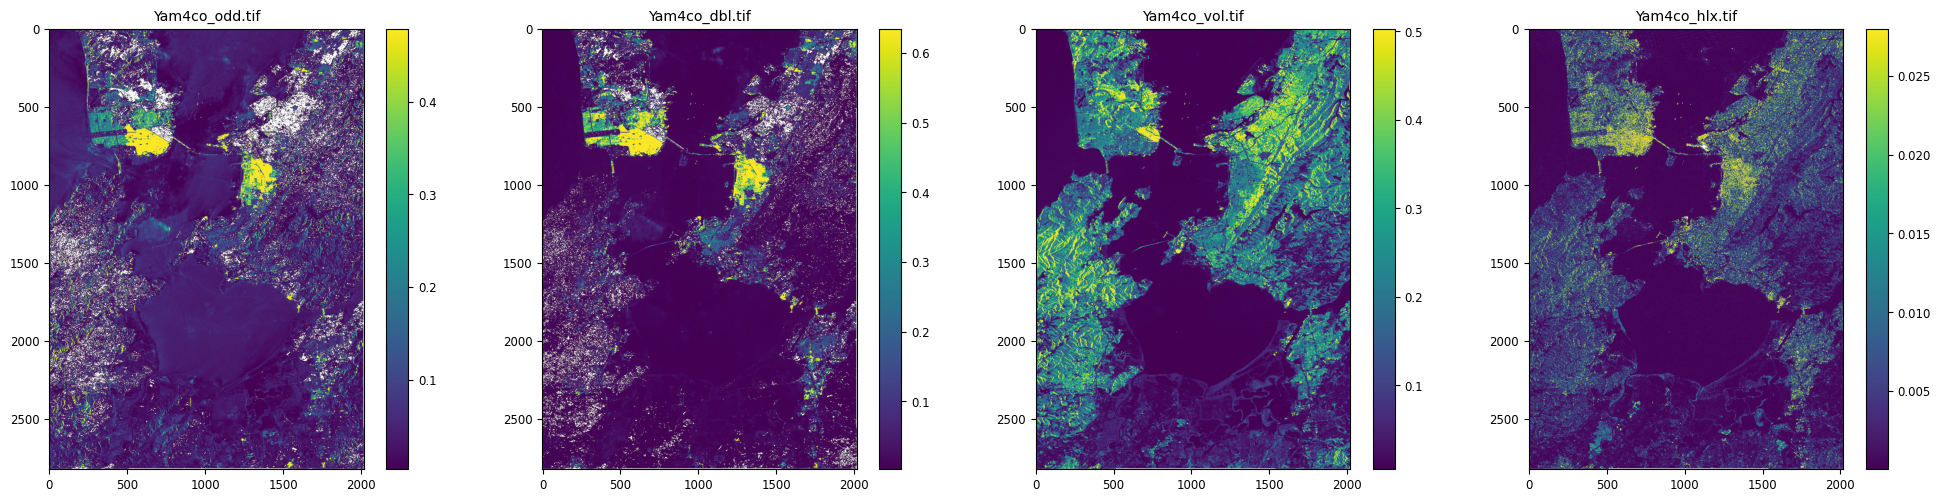

In [10]:
### Plotting
plot_images(os.path.join(C3Folder,'Yam4co_odd.tif'),
            os.path.join(C3Folder,'Yam4co_dbl.tif'),
            os.path.join(C3Folder,'Yam4co_vol.tif'),
            os.path.join(C3Folder,'Yam4co_hlx.tif'),
           )

#### Create False colour RGB from decomposed powers

RGB image saved as ../data/ALOS2_QP\rlee_3x3\C3\RGB.png
Execution time for rgb: 2.00 seconds


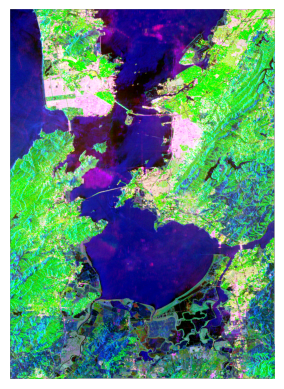

In [11]:
blue = os.path.join(C3Folder,'Yam4co_odd.tif')
red = os.path.join(C3Folder,'Yam4co_dbl.tif')
green = os.path.join(C3Folder,'Yam4co_vol.tif')

pst.rgb(red,green,blue)
